In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset=pd.read_csv("A2Q2Data_train.csv",header=None)
dataset=np.array(dataset)
dataset2=pd.read_csv("A2Q2Data_test.csv",header=None)
dataset2=np.array(dataset2)


In [20]:
X = dataset[:,:-1]
Y= dataset[:,-1]
X = X.T
Y=Y.T
X_test= dataset2[:,:-1]
Y_test= dataset2[:,-1]
X_test = X_test.T
Y_test=Y_test.T
w_ML=np.linalg.inv(np.matmul(X,X.T))@X@Y
print(w_ML.shape)
step=1e-6

(100,)


100
554


Text(0.5, 1.0, '||w_t-w_ML|| vs iterations')

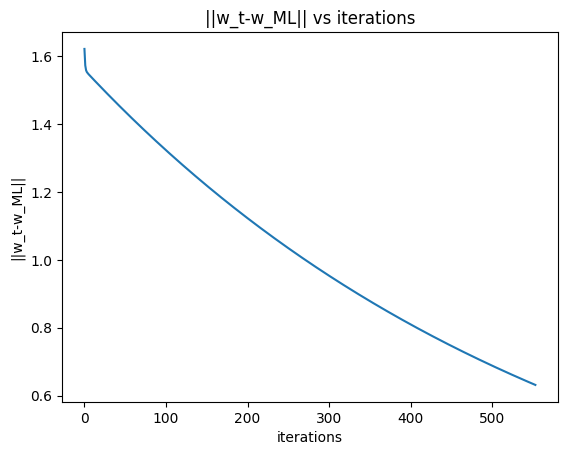

In [21]:

print(X.shape[0])
w_prev=np.zeros(X.shape[0])
w=np.zeros(X.shape[0])
a=(X@X.T)
b=(X@Y)
array=[]
array.append(np.linalg.norm(np.subtract(w,w_ML)))
while (1):
 
 w_prev=w
 w = w_prev-2*step*(np.subtract(a@w,b))
 array.append(np.linalg.norm(np.subtract(w,w_ML)))
 #if( len(array)>5000) :break
 if(np.linalg.norm(w-w_prev)/np.linalg.norm(w)<0.001 ) :break
print(len(array))
plt.plot(range(len(array)),array)
plt.xlabel("iterations")
plt.ylabel("||w_t-w_ML||")
plt.title("||w_t-w_ML|| vs iterations")

100
906


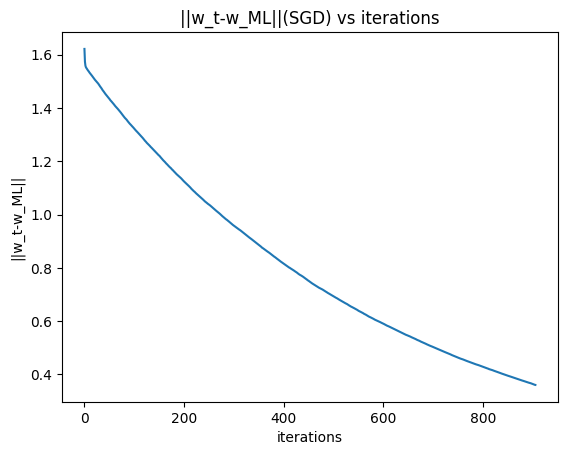

In [22]:
step1=1e-4
print(X.shape[0])
w1=np.zeros(X.shape[0])
W_SGD=np.zeros(X.shape[0])
w_prev1=np.zeros(X.shape[0])
array1=[]


array1.append(np.linalg.norm(np.subtract(w1,w_ML)))
W_SGD+=w1

while (1):
 
 temp= np.random.choice(X.shape[1],100,replace=False)
#  print(X.shape[1])
 A=X[:,temp]
 B=Y[temp]
 w_prev1=w1
 w1 = w1 -2*step1*(np.subtract((A@A.T)@w1,(A@B)))
 array1.append(np.linalg.norm(np.subtract(w1,w_ML)))
 W_SGD+=w1
 if(np.linalg.norm(w1-w_prev1)/np.linalg.norm(w1)<0.001 ) :break
 #if( len(array1)>5000) :break
W_SGD/=len(array1)
print(len(array1))
plt.plot(range(len(array1)),array1)
plt.xlabel("iterations")
plt.ylabel("||w_t-w_ML||")
plt.title("||w_t-w_ML||(SGD) vs iterations")
plt.show()

100


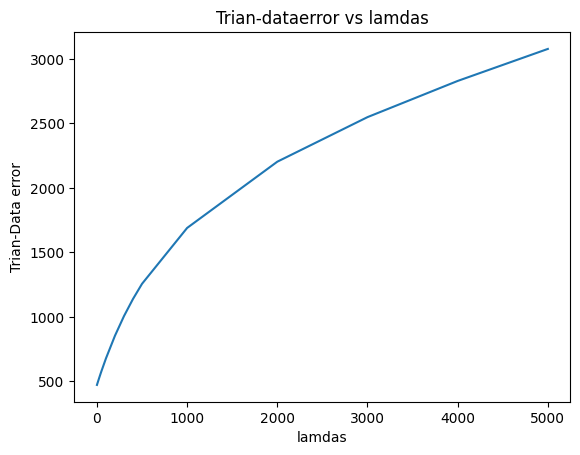

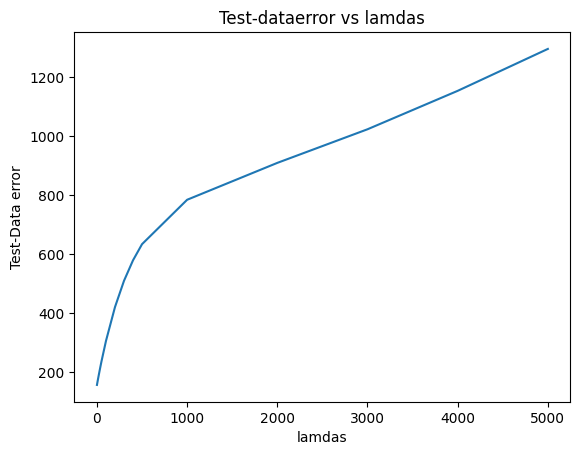

In [23]:
step2=1e-6
ls=[0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 1, 2, 3, 4, 5, 10, 12, 20, 30, 40, 50, 100, 200, 300, 400, 500, 1000, 2000, 3000, 4000, 5000]
print(X.shape[0])
Error_test=[]
Error_train=[]
for lamda in ls :
    w_prev2=np.zeros(X.shape[0])
    w2=np.zeros(X.shape[0])
    array2=[]
    array2.append(np.linalg.norm(np.subtract(w2,w_ML)))
    while (1):
    
     w_prev2=w2
     w2= w2-2*step2*(np.subtract(a@w2,b)+lamda*w2)
     array2.append(np.linalg.norm(np.subtract(w2,w_ML)))
     if( len(array2)>1000) :break
    Error_train.append(np.linalg.norm(X.T@w2-Y)**2+(lamda)*(np.linalg.norm(w2))**2)
    Error_test.append(np.linalg.norm(X_test.T@w2-Y_test)**2+(lamda)*(np.linalg.norm(w2))**2)
    # print(len(array2))
    # plt.plot(range(len(array2)),array2)
plt.plot(ls,Error_train)
plt.xlabel("lamdas")
plt.ylabel("Trian-Data error")
plt.title("Trian-dataerror vs lamdas")
plt.show()
plt.plot(ls,Error_test)
plt.xlabel("lamdas")
plt.ylabel("Test-Data error")
plt.title("Test-dataerror vs lamdas")
plt.show()


In [24]:
print("Train-Error w.r.t w_ML",np.linalg.norm((X.T@w_ML-Y))**2)
print("Test-Error w.r.t w_ML",np.linalg.norm((X_test.T@w_ML-Y_test))**2)
print(np.linalg.norm((X.T@w-Y))**2)
print(np.linalg.norm((X.T@W_SGD-Y))**2)
print(np.linalg.norm(X.T@w1-Y)**2)
print(np.linalg.norm(X.T@w2-Y)**2)

396.8644186272515
185.36365558489436
719.9682079037894
940.7966662447946
502.6226261072435
1890.215240307204
